# NLTK: Brown & Reuters

https://www.nltk.org/book/ch02.html

# Contents<a id="contents"></a>

* [Brown](#brown)
* [Reuters](#reuters)

In [1]:
# General

import json
import pandas as pd
import numpy as np
import string
import sys
import tqdm

from collections import (
    Counter,
    defaultdict,
)

# NLP

import nltk
import spacy

from nltk.corpus import (
    brown,
    reuters,
    stopwords,
)

# Plots

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
nltk.download('brown')
nltk.download('reuters')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /home/alekseev/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to /home/alekseev/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alekseev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
! {sys.executable} -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/data/topicnet/lib/python3.6/site-packages/en_core_web_sm -->
/data/topicnet/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:
# Initializing spacy 'en' model, keeping only tagger component needed for lemmatization

SPACY_MODEL = spacy.load('en', disable=['parser', 'ner'])
SPACY_PRON = '-PRON-'

In [5]:
# https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/


test_sentence = 'The striped bats are hanging on their feet for best'

# Parse the sentence using the loaded 'en' model object `nlp`
doc = SPACY_MODEL(test_sentence)

# Extract the lemma for each token and join
' '.join([token.lemma_ for token in doc])

'the stripe bat be hang on -PRON- foot for good'

In [6]:
STOPWORDS = set(stopwords.words('english'))
PUNCTUATION = string.punctuation

In [7]:
PUNCTUATION

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# https://github.com/machine-intelligence-laboratory/TopicNet/blob/master/topicnet/demos/Making-Decorrelation-and-Topic-Selection-Friends.ipynb


COLOR = (176/255, 0, 0)
FIGSIZE = (15, 10)
LINEWIDTH = 5
LABELPAD = 10


# https://en.wikipedia.org/wiki/Zipf%27s_law

def draw_zipfs_plot(
        texts,
        low_outlier_percentile_bound=1,
        upper_outlier_percentile_bound=99,
        ax=None):

    counter = Counter(' '.join(texts).split())
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    else:
        fig = None
    
    frequencies = [freq for word, freq in counter.most_common()]
    low_outlier_bound = np.percentile(frequencies, low_outlier_percentile_bound)
    upper_outlier_bound = np.percentile(frequencies, upper_outlier_percentile_bound)
    frequencies = [freq for freq in frequencies if freq > low_outlier_bound and freq <= upper_outlier_bound]
    
    ranks = range(1, len(frequencies) + 1)
    
    ax.plot(ranks, frequencies, lw=LINEWIDTH, color=COLOR)
    
    ax.set_xlabel('Rank', labelpad=LABELPAD)
    ax.set_ylabel('Frequency', labelpad=LABELPAD)
    ax.set_title('Zipf\'s law')
    
    if fig is not None:
        plt.show()

    return ax


# https://en.wikipedia.org/wiki/Heaps%27_law

def draw_heaps_plot(
        texts,
        in_symbols=True,
        ax=None):

    if in_symbols is True:
        lengths = [len(t) for t in texts]
        length_units = 'symbols'
    else:
        lengths = [len(t.split()) for t in texts]
        length_units = 'words'

    num_uniques = [len(set(t.split())) for t in texts]
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    else:
        fig = None
    
    ax.scatter(lengths, num_uniques, s=4 * LINEWIDTH ** 2, color=COLOR)
    
    ax.set_xlabel(f'Document length ({length_units})', labelpad=LABELPAD)
    ax.set_ylabel('Number of unique tokens', labelpad=LABELPAD)
    ax.set_title('Heaps\' law')
    
    if fig is not None:
        plt.show()

    return ax


def draw_document_lengths_histogram(
        texts,
        in_symbols=False,
        low_outlier_percentile_bound=1,
        upper_outlier_percentile_bound=99,
        bins=200,
        ax=None):

    if in_symbols is True:
        lengths = [len(t) for t in texts]
        length_units = 'symbols'
    else:
        lengths = [len(t.split()) for t in texts]
        length_units = 'words'

    low_outlier_bound = np.percentile(lengths, low_outlier_percentile_bound)
    upper_outlier_bound = np.percentile(lengths, upper_outlier_percentile_bound)
    lengths = [l for l in lengths if l > low_outlier_bound and l <= upper_outlier_bound]
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    else:
        fig = None
    
    ax.hist(lengths, bins=bins, color=COLOR)
    
    ax.set_xlabel(f'Document length ({length_units})', labelpad=LABELPAD)
    ax.set_ylabel('Number of documents', labelpad=LABELPAD)
    ax.set_title('Document lengths distribution')
    
    if fig is not None:
        plt.show()

    return ax


def draw_statistics(texts, figsize=(20, 15), font_size=16):
    old_font_size = plt.rcParams['font.size']
    plt.rcParams.update({'font.size': font_size})

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    draw_zipfs_plot(
        texts,
        ax=axes[0][0]
    )
    draw_document_lengths_histogram(
        texts,
        ax=axes[0][1]
    )
    draw_heaps_plot(
        texts,
        ax=axes[1][0],
        in_symbols=True
    )
    draw_heaps_plot(
        texts,
        ax=axes[1][1],
        in_symbols=False
    )
    
    plt.show()
    
    plt.rcParams.update({'font.size': old_font_size})

## Brown<a id="brown"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [9]:
print(brown.readme())

BROWN CORPUS

A Standard Corpus of Present-Day Edited American
English, for use with Digital Computers.

by W. N. Francis and H. Kucera (1964)
Department of Linguistics, Brown University
Providence, Rhode Island, USA

Revised 1971, Revised and Amplified 1979

http://www.hit.uib.no/icame/brown/bcm.html

Distributed with the permission of the copyright holder,
redistribution permitted.



In [10]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [11]:
# num docs

len(brown.fileids())

500

In [12]:
# doc names

brown.fileids()[:5]

['ca01', 'ca02', 'ca03', 'ca04', 'ca05']

In [13]:
brown.fileids()[-5:]

['cr05', 'cr06', 'cr07', 'cr08', 'cr09']

In [14]:
len(brown.words('ca01'))

2242

In [15]:
brown.words('ca01')[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [16]:
# doc's raw text

brown.raw('ca01')[:50].strip()

'The/at Fulton/np-tl County/nn-tl Grand/jj-tl Ju'

In [17]:
brown.sents('ca02')[:2]

[['Austin', ',', 'Texas'],
 ['--',
  'Committee',
  'approval',
  'of',
  'Gov.',
  'Price',
  "Daniel's",
  '``',
  'abandoned',
  'property',
  "''",
  'act',
  'seemed',
  'certain',
  'Thursday',
  'despite',
  'the',
  'adamant',
  'protests',
  'of',
  'Texas',
  'bankers',
  '.']]

In [18]:
brown.raw('ca02')[:50].strip()

'Austin/np-hl ,/,-hl Texas/np-hl \n--/-- Committee/n'

In [19]:
' '.join(brown.raw('ca02')[:50].split())

'Austin/np-hl ,/,-hl Texas/np-hl --/-- Committee/n'

In [20]:
brown.categories(['ca01', 'cr05'])

['humor', 'news']

In [21]:
DATASET_NAME = 'Brown'
DATASET_FILE_NAME = DATASET_NAME + '.csv'

DATA_HANDLER = brown
FILE_NAMES = DATA_HANDLER.fileids()

file2topics = defaultdict(list)
topic2files = defaultdict(list)


with open(DATASET_FILE_NAME, 'w') as f:
    f.write('id,vw_text,raw_text')
    f.write('\n')


for file_name in tqdm.tqdm(FILE_NAMES, total=len(FILE_NAMES), file=sys.stdout):
    raw_text = DATA_HANDLER.raw(file_name)
    raw_text = raw_text.replace('\"', '\'')  # for .csv safety ("\n", "," and so on)
    
    words = DATA_HANDLER.words(file_name)
    
    ### Building VW Text ###
    
    modality2words = dict()
    modality2words['word'] = list()
    
    for word in words:
        if word in PUNCTUATION:
            continue
        if word in ['lt', 'gt']:  # &lt; &gt;
            continue
        
        modality2words['word'].append(word)

    modality2text = dict()

    for modality, modality_words in modality2words.items():
        modality_words = [
            w.lower() for w in modality_words
        ]
        doc = SPACY_MODEL(' '.join(modality_words))
        words = [
            w.lemma_.lower()
            for w in doc
            if w.lemma_ != SPACY_PRON
        ]
        words = [
            w for w in words
            if w not in STOPWORDS
            if all([s not in w for s in PUNCTUATION])
            
        ]
        
        modality2text[modality] = ' '.join(words)
    
    vw_text = f'{file_name}'
    
    for modality, modality_text in modality2text.items():
        vw_text += f' |@{modality} {modality_text}'
    
    ### VW Text Done ###
    
    with open(DATASET_FILE_NAME, 'a') as f:
        f.write(f'\"{file_name}\",\"{vw_text}\",\"{raw_text}\"')
        f.write('\n')
    
    topics = DATA_HANDLER.categories(file_name)
    
    file2topics[file_name] = list(topics)
    
    for topic in topics:
        topic2files[topic].append(file_name)

100%|██████████| 500/500 [01:38<00:00,  5.08it/s]


In [22]:
with open(f'{DATASET_NAME}_topic2docs.json', 'w') as f:
    f.write(json.dumps(topic2files))

In [23]:
with open(f'{DATASET_NAME}_doc2topics.json', 'w') as f:
    f.write(json.dumps(file2topics))

In [24]:
len(topic2files)

15

In [25]:
len(file2topics)

500

In [26]:
df = pd.read_csv(DATASET_FILE_NAME)

In [27]:
df['vw_text'][2][:500]

'ca03 |@word several defendant summerdale police burglary trial make statement indicate guilt time arrest judge james parsons tell criminal court yesterday disclosure charles bellow chief defense counsel startle observer view prelude quarrel six attorney represent eight former policeman trial bellow make disclosure ask judge parson grant client alan clement 30 separate trial bellow make request woman jury courtroom fear prejudicial aspect statement may highly prejudicial client bellow tell court '

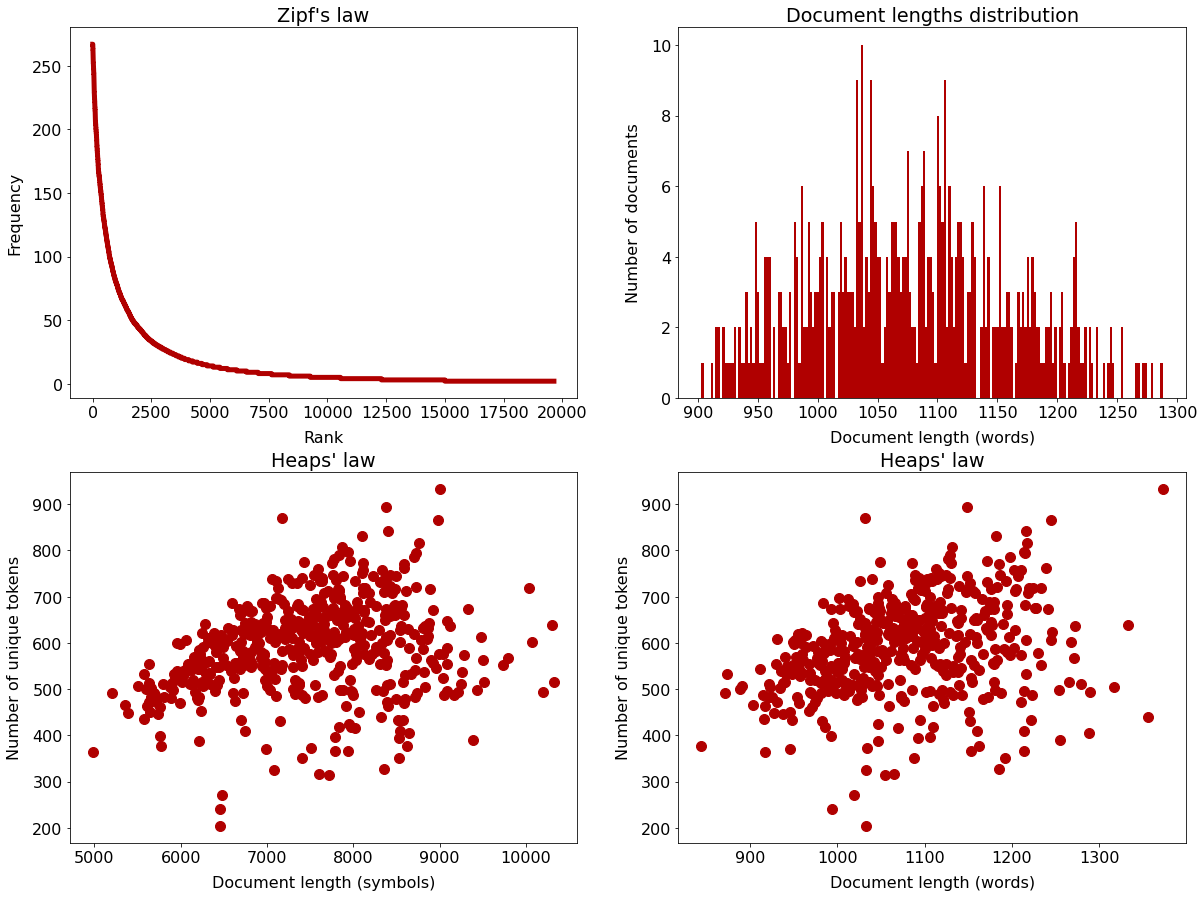

In [28]:
draw_statistics(df['vw_text'])

## Reuters<a id="reuters"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [29]:
print(reuters.readme())


      The Reuters-21578 benchmark corpus, ApteMod version

This is a publically available version of the well-known Reuters-21578
"ApteMod" corpus for text categorization.  It has been used in
publications like these:

 * Yiming Yang and X. Liu. "A re-examination of text categorization
   methods".  1999.  Proceedings of 22nd Annual International SIGIR.
   http://citeseer.nj.nec.com/yang99reexamination.html

 * Thorsten Joachims. "Text categorization with support vector
   machines: learning with many relevant features".  1998. Proceedings
   of ECML-98, 10th European Conference on Machine Learning.
   http://citeseer.nj.nec.com/joachims98text.html

ApteMod is a collection of 10,788 documents from the Reuters financial
newswire service, partitioned into a training set with 7769 documents
and a test set with 3019 documents.  The total size of the corpus is
about 43 MB.  It is also available for download from
http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html ,
which includ

In [30]:
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [31]:
# num docs

len(reuters.fileids())

10788

In [32]:
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [33]:
reuters.fileids()[-10:]

['training/9982',
 'training/9984',
 'training/9985',
 'training/9988',
 'training/9989',
 'training/999',
 'training/9992',
 'training/9993',
 'training/9994',
 'training/9995']

In [34]:
len(reuters.words('test/14826'))

899

> The first handful of words in each of the texts are the **titles, which by convention are stored as upper case**.

In [35]:
reuters.words('test/14826')[:30]

['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U',
 '.',
 'S',
 '.-',
 'JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction',
 'between',
 'the',
 'U',
 '.',
 'S',
 '.',
 'And',
 'Japan',
 'has',
 'raised',
 'fears',
 'among',
 'many',
 'of',
 'Asia',
 "'"]

In [36]:
reuters.words('training/999')[:20]

['U',
 '.',
 'K',
 '.',
 'MONEY',
 'MARKET',
 'SHORTAGE',
 'FORECAST',
 'REVISED',
 'DOWN',
 'The',
 'Bank',
 'of',
 'England',
 'said',
 'it',
 'had',
 'revised',
 'its',
 'forecast']

In [37]:
reuters.raw('training/999')[:60]

'U.K. MONEY MARKET SHORTAGE FORECAST REVISED DOWN\n  The Bank '

> !!! Unlike the Brown Corpus, **categories in the Reuters corpus overlap with each other**, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.

In [38]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [41]:
DATASET_NAME = 'Reuters'
DATASET_FILE_NAME = DATASET_NAME + '.csv'

DATA_HANDLER = reuters
FILE_NAMES = DATA_HANDLER.fileids()

file2topics = defaultdict(list)
topic2files = defaultdict(list)


with open(DATASET_FILE_NAME, 'w') as f:
    f.write('id,vw_text,raw_text')
    f.write('\n')

    
for file_name in tqdm.tqdm(FILE_NAMES, total=len(FILE_NAMES), file=sys.stdout):
    raw_text = DATA_HANDLER.raw(file_name)
    raw_text = raw_text.replace('\"', '\'')  # making VW with care
    
    words = DATA_HANDLER.words(file_name)

    ### VW Text ##
    
    modality2words = dict()
    modality2words['title'] = list()
    modality2words['word'] = list()
    is_title = True
    
    for word in words:
        if word in PUNCTUATION:
            continue
        if word in ['lt', 'gt']:
            continue

        if not is_title:
            modality2words['word'].append(word)
        elif word.upper() != word:
            modality2words['word'].append(word)
            is_title = False
        else:
            modality2words['title'].append(word) 

    modality2text = dict()

    for modality, modality_words in modality2words.items():
        modality_words = [
            w.lower() for w in modality_words
        ]
        doc = SPACY_MODEL(' '.join(modality_words))
        words = [
            w.lemma_.lower()
            for w in doc
            if w.lemma_ != SPACY_PRON
        ]
        words = [
            w for w in words
            if w not in STOPWORDS
            if all([s not in w for s in PUNCTUATION])
            
        ]
        
        modality2text[modality] = ' '.join(words)
    
    vw_text = f'{file_name}'
    
    for modality, modality_text in modality2text.items():
        vw_text += f' |@{modality} {modality_text}'
    
    ### VW Text Done ###
    
    with open(DATASET_FILE_NAME, 'a') as f:
        f.write(f'\"{file_name}\",\"{vw_text}\",\"{raw_text}\"')
        f.write('\n')
    
    topics = DATA_HANDLER.categories(file_name)
    
    file2topics[file_name] = list(topics)
    
    for topic in topics:
        topic2files[topic].append(file_name)

100%|██████████| 10788/10788 [03:18<00:00, 54.37it/s]


In [42]:
with open(f'{DATASET_NAME}_topic2docs.json', 'w') as f:
    f.write(json.dumps(topic2files))

In [43]:
with open(f'{DATASET_NAME}_doc2topics.json', 'w') as f:
    f.write(json.dumps(file2topics))

In [44]:
len(topic2files)

90

In [45]:
len(file2topics)

10788

In [46]:
df = pd.read_csv(DATASET_FILE_NAME)

In [47]:
df['vw_text'][2][:500]

'test/14829 |@title japan revise long term energy demand downwards |@word ministry international trade industry miti revise long term energy supply demand outlook august meet forecast downtrend japanese energy demand ministry official say miti expect lower projection primary energy supply year 2000 550 mln kilolitre kl 600 mln say decision follow emergence structural change japanese industry follow rise value yen decline domestic electric power demand miti plan work revise energy supply demand ou'

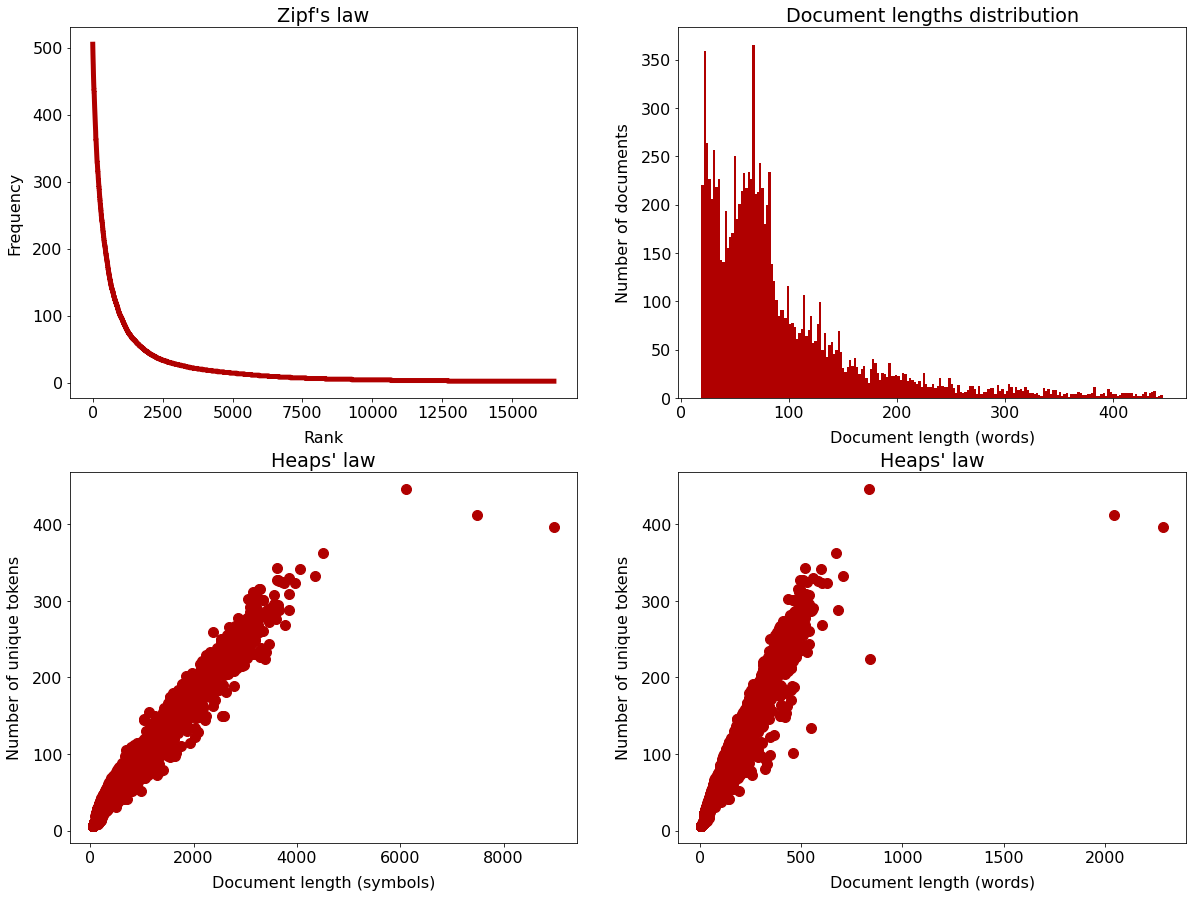

In [48]:
draw_statistics(df['vw_text'])